In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [ ]:
# View all of the classes that automap found


In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
 [column for column in measurement.__table__.columns]

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [9]:
[column for column in station.__table__.columns]

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.


In [11]:
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.datetime(2017, 8, 23)
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [13]:
# Calculate the date one year from the last date in data set.
first_date = dt.date(2017,8,23) - dt.timedelta(days=365)
first_date

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(measurement.date, measurement.prcp).\
filter(measurement.date >= "2016-08-23").filter(measurement.date <= "2017-08-23").\
order_by(measurement.date).all()
prcp_scores

[('2016-08-23', 0.0),
 ('2016-08-23', 3.8),
 ('2016-08-23', 1.3),
 ('2016-08-23', None),
 ('2016-08-23', 0.5),
 ('2016-08-23', 45.5),
 ('2016-08-23', 17.8),
 ('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9

In [15]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_scores_df = pd.DataFrame(data=prcp_scores).set_index('date')

prcp_scores_df =prcp_scores_df.rename(columns={'prcp':'Precipitation'})
prcp_scores_df

,Precipitation
date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,NaN
2016-08-23,0.5
...,...
2017-08-22,12.7
2017-08-23,0.0
2017-08-23,0.0


In [16]:
# Sort the dataframe by date
sorted_prcp_scores = prcp_scores_df.sort_values('date')
sorted_prcp_scores

,Precipitation
date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,NaN
2016-08-23,0.5
...,...
2017-08-22,12.7
2017-08-23,2.0
2017-08-23,0.0


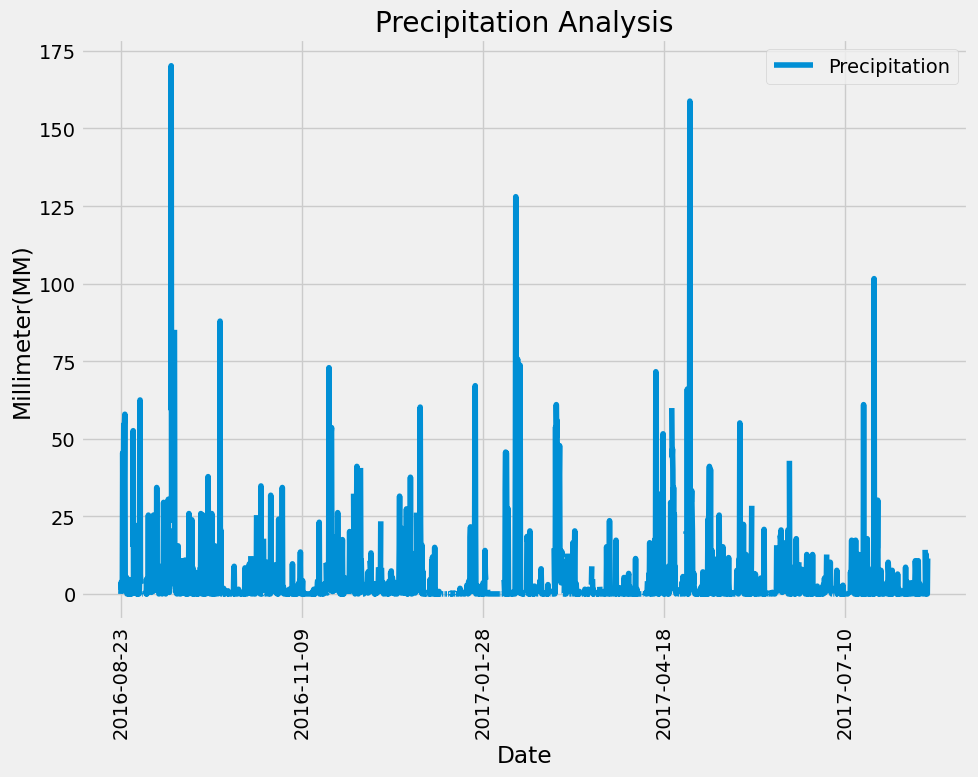

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_scores.plot(figsize = (10,8))
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Millimeter(MM)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


In [18]:
sorted_prcp_scores.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(station).count()
stations_count


9

In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
session.query(*sel).filter(measurement.station == stations[0][0]).all()

[(12.2, 29.4, 22.03582251082252)]

In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year_temp_MostActive = session.query(measurement.date,measurement.tobs).filter(measurement.date >= "2016-08-23").\
filter(measurement.station == 'USC00519281').order_by(measurement.date).all()
prev_year_temp_MostActive

[('2016-08-23', 25.0),
 ('2016-08-24', 25.0),
 ('2016-08-25', 26.7),
 ('2016-08-26', 26.7),
 ('2016-08-27', 23.9),
 ('2016-08-28', 22.8),
 ('2016-08-29', 25.6),
 ('2016-08-30', 25.0),
 ('2016-08-31', 25.6),
 ('2016-09-01', 26.7),
 ('2016-09-02', 26.7),
 ('2016-09-03', 25.6),
 ('2016-09-04', 25.6),
 ('2016-09-05', 25.6),
 ('2016-09-06', 22.8),
 ('2016-09-07', 23.3),
 ('2016-09-08', 26.7),
 ('2016-09-09', 26.1),
 ('2016-09-10', 25.0),
 ('2016-09-11', 26.7),
 ('2016-09-12', 24.4),
 ('2016-09-13', 26.1),
 ('2016-09-14', 23.9),
 ('2016-09-15', 26.1),
 ('2016-09-16', 25.6),
 ('2016-09-17', 26.1),
 ('2016-09-18', 25.6),
 ('2016-09-19', 25.6),
 ('2016-09-20', 24.4),
 ('2016-09-21', 23.3),
 ('2016-09-22', 25.0),
 ('2016-09-23', 25.6),
 ('2016-09-24', 26.1),
 ('2016-09-25', 26.1),
 ('2016-09-26', 25.0),
 ('2016-09-27', 26.7),
 ('2016-09-28', 25.6),
 ('2016-09-29', 25.6),
 ('2016-09-30', 25.6),
 ('2016-10-01', 25.0),
 ('2016-10-02', 26.1),
 ('2016-10-03', 26.1),
 ('2016-10-04', 26.1),
 ('2016-10-

In [40]:
most_active_station_df = pd.DataFrame(data=prev_year_temp_MostActive).set_index('date')
most_active_station_df

,tobs
date,
2016-08-23,25.0
2016-08-24,25.0
2016-08-25,26.7
2016-08-26,26.7
2016-08-27,23.9
...,...
2017-08-14,25.0
2017-08-15,25.0
2017-08-16,24.4


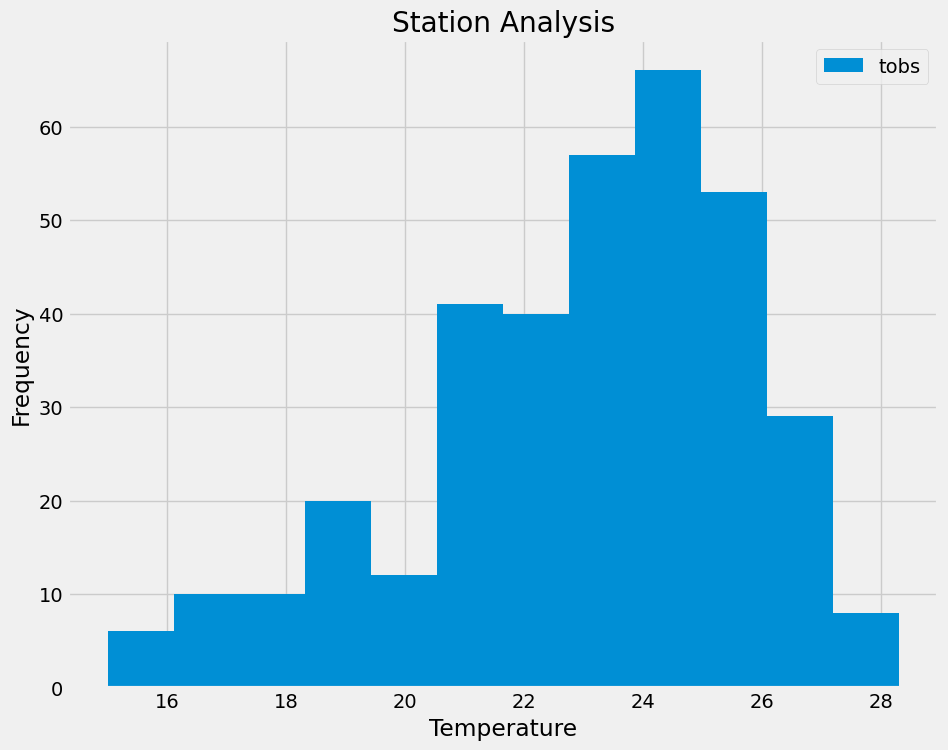

In [42]:
plt.figure(figsize=(10,8))
plt.hist(most_active_station_df['tobs'], bins=12)
plt.title("Station Analysis")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

# Close Session

In [43]:
# Close Session
session.close()